## Loading dependencies and creating functions

In [1]:
!pip install visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 7.7 MB/s eta 0:00:00


In [26]:
import visualkeras as vk
import tensorflow as tf
import os
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from collections import defaultdict
from google.colab import drive
drive.mount("/content/drive")
os.chdir("/content/drive/MyDrive/MachineLearningProject")
import sys
sys.path.append("/drive/MyDrive/MachineLearningProject")
from helper_functions import plot_metrics

from tensorflow.keras.layers import Dense, Conv2D, Flatten, AveragePooling2D, MaxPooling2D, ZeroPadding2D, ReLU, RandomFlip, RandomContrast, Lambda, BatchNormalization, PReLU

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
def plot_history(df, figsize=(12,6), y_lim_left=(0,1), y_lim_right=(0,1)):
    """
    Plots the loss and accuracy curves.
    :param df: the data frame containing the histories we want to plot
    :param y_lim: Tuple. If not differently specified, it's (0,1). Only applies to the accuracy plot.
    :return: None
    """

    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=2)

    training_loss = df['loss']
    training_accuracy = df['accuracy']

    validation_loss = df['val_loss']
    validation_accuracy = df['val_accuracy']

    epochs = df['epoch']

    # Plot Loss
    ax[0].plot(epochs, training_loss, label = "Training Loss", linewidth=2, color="#0291b5")
    ax[0].plot(epochs, validation_loss, label = "Validation Loss", linewidth=2, color="#eb0076")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Training Loss vs Validation Loss")
    ax[0].set_ylim(y_lim_left)
    ax[0].legend()
    ax[0].grid()

    # Plot Accuracy
    ax[1].plot(epochs, training_accuracy, label = "Training Accuracy", linewidth=2, color="#0291b5")
    ax[1].plot(epochs, validation_accuracy, label = "Validation Accuracy", linewidth=2, color="#eb0076")
    ax[1].set_xlabel("Epochs")
    ax[1].set_title("Training Accuracy vs Validation Accuracy")
    ax[1].set_ylim(y_lim_right)
    ax[1].legend()
    ax[1].grid()

    plt.show()

In [4]:
def csv_to_df(filepath):
    """
    Takes a CSV file and creates a Pandas DataFrame.
    :param filepath: Path of the .csv file to create the DataFrame from.
    :return: A Pandas DataFrame containing the data from the CSV file.
    """

    # Reading the csv file and creating the DataFrame
    df = pd.read_csv(filepath)

    return df

Customize with the colors.

In [5]:
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'lightblue'
color_map[ReLU]['fill'] = 'green'
color_map[MaxPooling2D]['fill'] = 'plum'
color_map[BatchNormalization]['fill'] = 'pink'
color_map[AveragePooling2D]['fill'] = 'goldenrod'
color_map[Dense]['fill'] = 'slateblue'
color_map[Flatten]['fill'] = 'lightcoral'
color_map[PReLU]['fill'] = 'silver'

## Sequential 1

#### Architecture visualisation

In [ ]:
seq_1 = tf.keras.models.load_model(
    "/content/drive/MyDrive/MachineLearningProject/models/sequential/seq_1.keras",
    safe_mode=False)

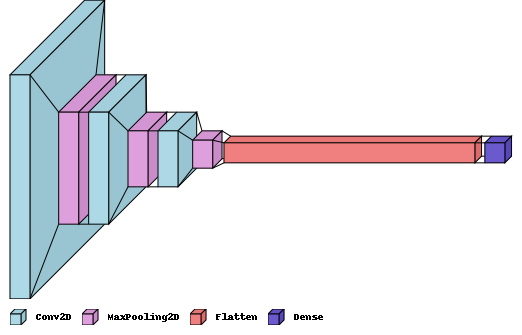

In [ ]:
vk.layered_view(seq_1, legend=True,
                scale_xy=1,
                scale_z=.01,
                type_ignore=[RandomFlip, RandomContrast, Lambda],
                color_map=color_map)

#### Model performance

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/sequential")
!ls

seq_1_hist.json  seq_1.log  seq_2_hist.json


In [ ]:
seq1_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/sequential/seq_1.log")

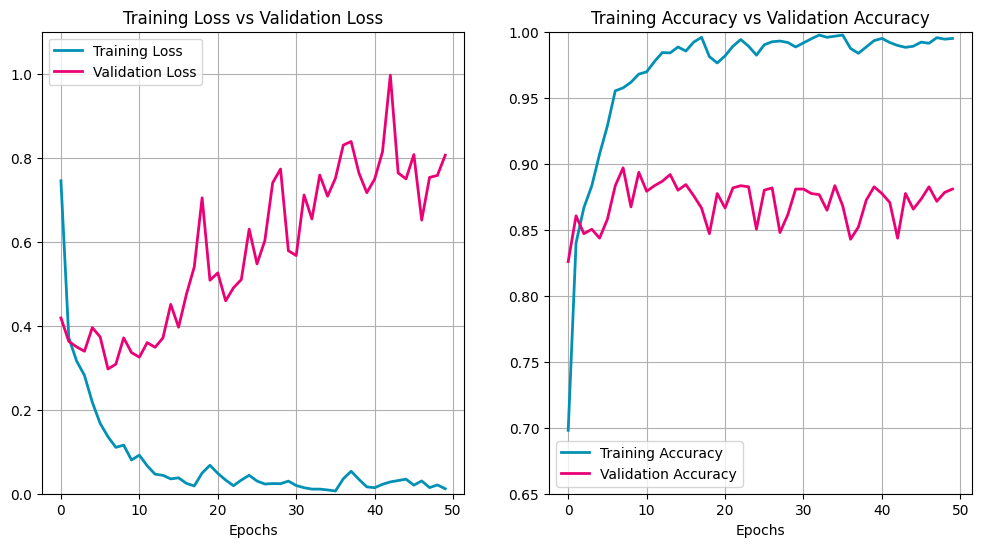

In [ ]:
plot_history(seq1_df, y_lim_left=(0,1.1), y_lim_right=(0.65,1))

## Sequential 2

#### Architecture visualization

In [ ]:
%run sequential.py

In [ ]:
seq_2 = tf.keras.models.load_model(
    "/content/drive/MyDrive/MachineLearningProject/models/sequential/seq_2.keras",
    safe_mode=False)

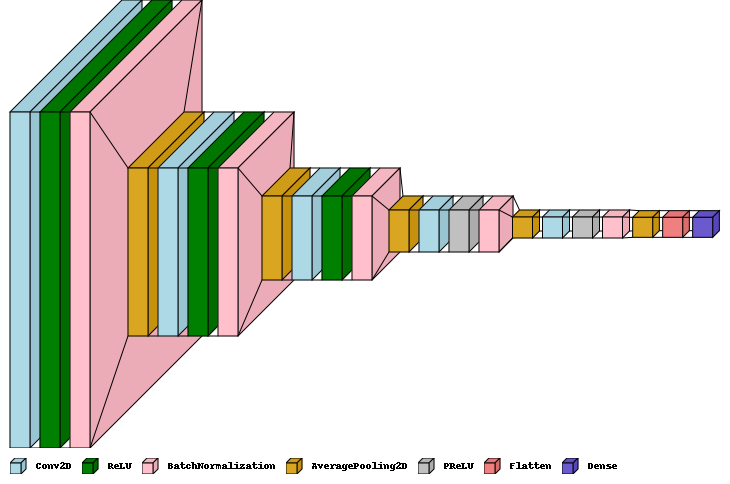

In [ ]:
vk.layered_view(seq_2, legend=True, scale_xy=1.5, scale_z=.0001,
                type_ignore=[RandomFlip, RandomContrast, Lambda],
                color_map=color_map)

#### Model performance

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/sequential")
!ls

seq_1.log  seq_2.log


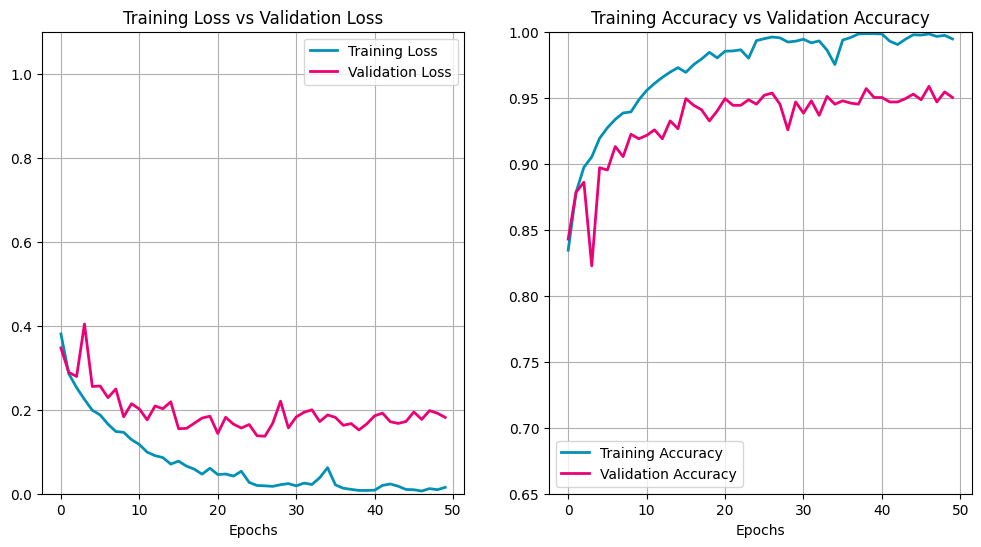

In [ ]:
seq2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/sequential/seq_2.log")
plot_history(seq2_df, y_lim_left=(0,1.1), y_lim_right=(0.65,1))

## VGG 1

#### Architecture visualization

In [ ]:
vgg_1 = tf.keras.models.load_model(
    "/content/drive/MyDrive/MachineLearningProject/models/vgg/vgg_1.keras",
    safe_mode=False)

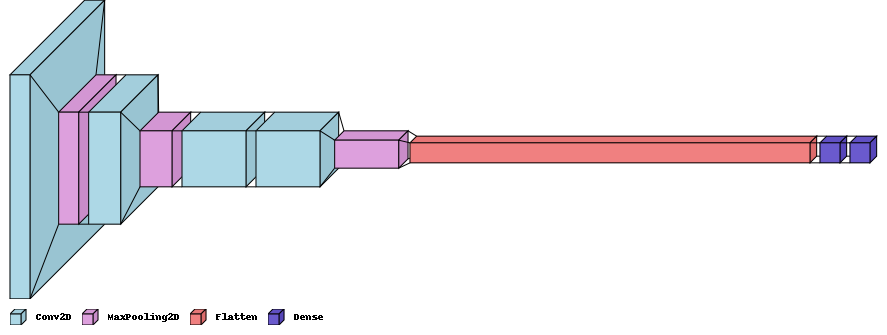

In [ ]:
vk.layered_view(vgg_1,
                legend=True,
                scale_xy=1,
                scale_z=1,
                type_ignore=[RandomFlip, RandomContrast, Lambda],
                color_map=color_map)

#### Model performance

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/vgg")
!ls

vgg_1.log  vgg_2.log


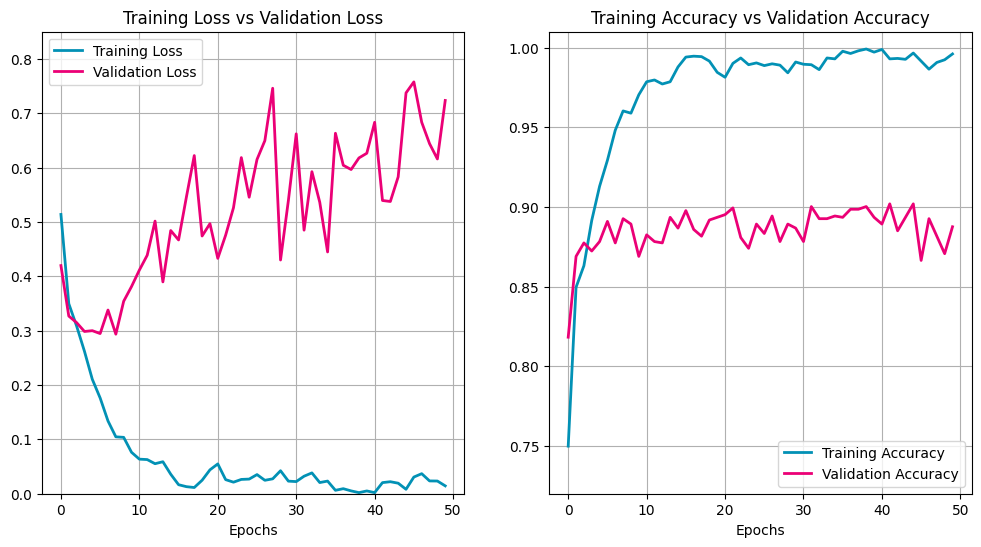

In [ ]:
vgg1_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/vgg/vgg_1.log")
plot_history(vgg1_df, y_lim_left=(0,0.85), y_lim_right=(0.72,1.01))

## VGG 2

#### Architecture visualization

In [ ]:
vgg_2 = tf.keras.models.load_model(
    "/content/drive/MyDrive/MachineLearningProject/models/vgg/vgg_2.keras",
    safe_mode=False)

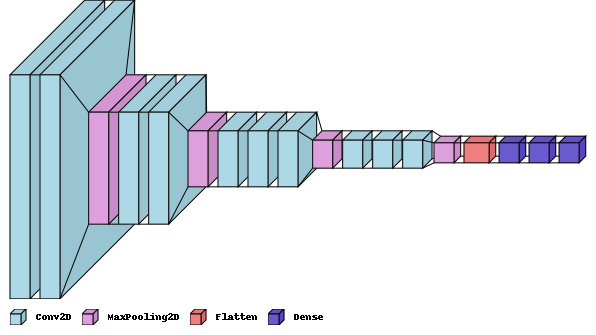

In [ ]:
vk.layered_view(vgg_2,
                legend=True,
                scale_xy=1,
                scale_z=0.001,
                type_ignore=[RandomFlip, RandomContrast, Lambda],
                color_map=color_map)

#### Model performance

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/vgg")
!ls

vgg_1.log  vgg_2.log


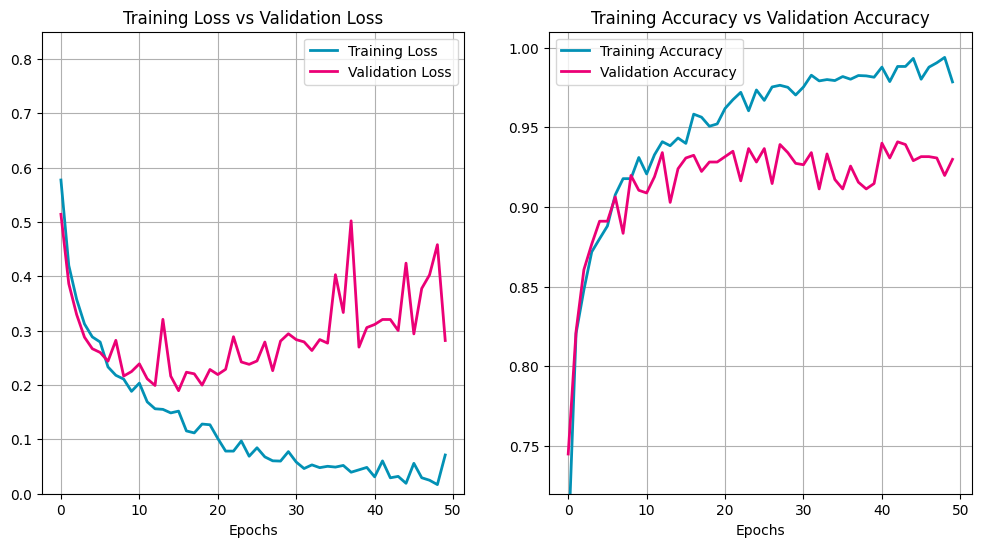

In [ ]:
vgg2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/vgg/vgg_2.log")
plot_history(vgg2_df, y_lim_left=(0,0.85), y_lim_right=(0.72,1.01))

## ResNet14

### Model performance

In [27]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/resnet")
!ls

res_14.log  res_32.log


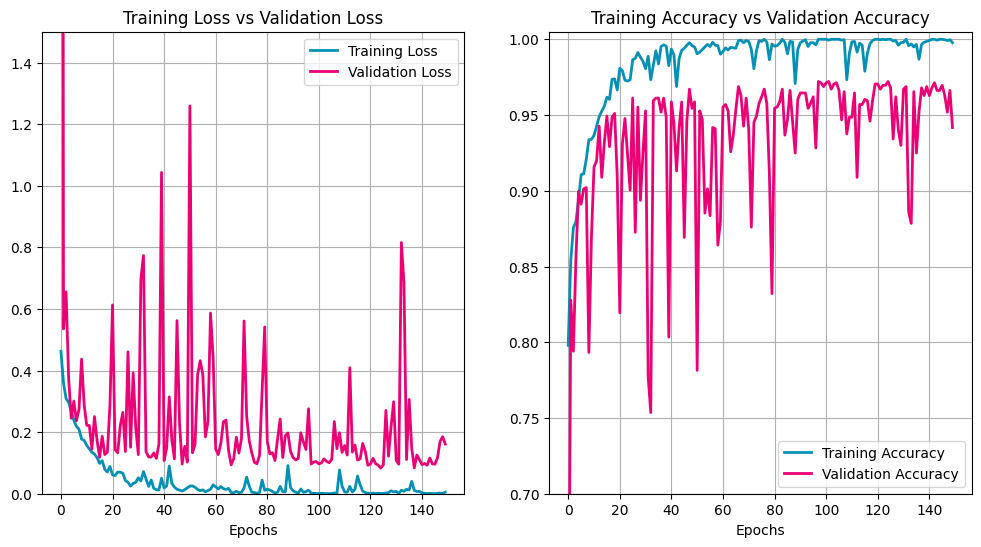

In [28]:
res14_df = csv_to_df("res_14.log")
plot_history(res14_df[:150], y_lim_left=(0,1.5), y_lim_right=(0.7,1.005))

## ResNet32

### Model performance

In [6]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/resnet")
!ls

res_14.log  res_32.log


,epoch,accuracy,loss,lr,val_accuracy,val_loss
0,0,0.808138,0.466158,5.000000e-04,0.483953,7.813493
1,1,0.872022,0.317208,5.000000e-04,0.552365,2.706276
2,2,0.907232,0.244893,5.000000e-04,0.910473,0.242713
3,3,0.917352,0.216202,5.000000e-04,0.817568,0.450444
4,4,0.914822,0.209037,5.000000e-04,0.919764,0.208341
...,...,...,...,...,...,...
145,145,1.000000,0.000045,7.150605e-07,0.967905,0.153246
146,146,1.000000,0.000085,6.801866e-07,0.967905,0.152149
147,147,1.000000,0.000126,6.470135e-07,0.968750,0.152150
148,148,1.000000,0.000067,6.154583e-07,0.969595,0.152494


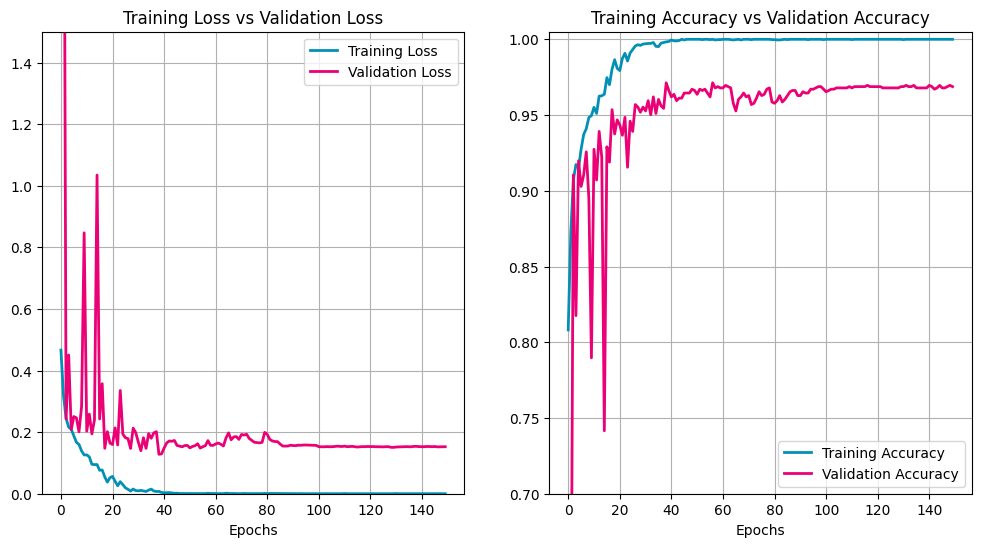

In [16]:
res32_df = csv_to_df("res_32.log")
plot_history(res32_df[:150], y_lim_left=(0,1.5), y_lim_right=(0.7,1.005))

## All in one - Seqs and VGGs

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories")
!ls

resnet	sequential  vgg


In [ ]:
seq1_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/sequential/seq_1.log")
seq2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/sequential/seq_2.log")
vgg1_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/vgg/vgg_1.log")
vgg2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/vgg/vgg_2.log")

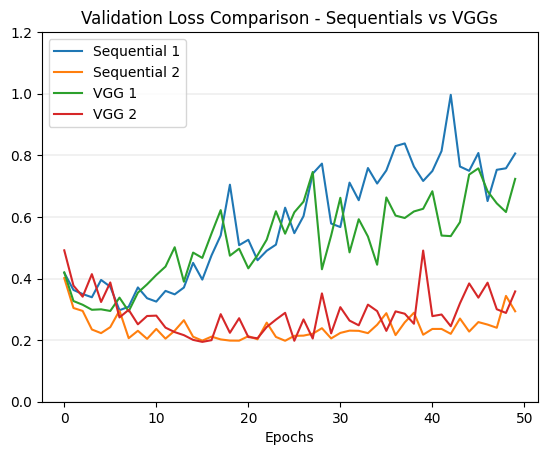

In [ ]:
plt.plot(seq1_df['epoch'], seq1_df['val_loss'], label = 'Sequential 1')
plt.plot(seq2_df['epoch'], seq2_df['val_loss'], label = 'Sequential 2')
plt.plot(vgg1_df['epoch'], vgg1_df['val_loss'], label = 'VGG 1')
plt.plot(vgg2_df['epoch'], vgg2_df['val_loss'], label = 'VGG 2')
plt.legend()
plt.title('Validation Loss Comparison - Sequentials vs VGGs')
plt.xlabel('Epochs')
plt.ylim(0,1.2)
plt.grid(axis='y', linewidth=0.25)
plt.show()

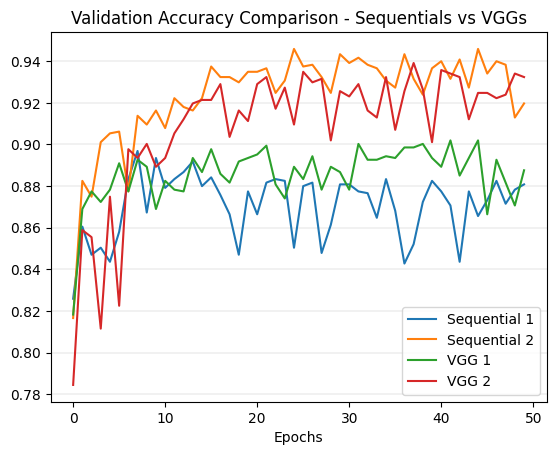

In [ ]:
plt.plot(seq1_df['epoch'], seq1_df['val_accuracy'], label = 'Sequential 1')
plt.plot(seq2_df['epoch'], seq2_df['val_accuracy'], label = 'Sequential 2')
plt.plot(vgg1_df['epoch'], vgg1_df['val_accuracy'], label = 'VGG 1')
plt.plot(vgg2_df['epoch'], vgg2_df['val_accuracy'], label = 'VGG 2')
plt.legend()
plt.title('Validation Accuracy Comparison - Sequentials vs VGGs')
plt.xlabel('Epochs')
plt.grid(axis="y", linewidth=0.25)
plt.show()

## Transfer Learning comparison

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/transfer")
!ls

efficientnet_b0_v2.log	efficientnet_b3_v2.log	res50_v1.log  res50_v2.log  vgg_19.log


In [ ]:
efficientnet_b0_v2 = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/transfer/efficientnet_b0_v2.log")
efficientnet_b3_v2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/transfer/efficientnet_b3_v2.log")
res50_v1_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/transfer/res50_v1.log")
res50_v2_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/transfer/res50_v2.log")
vgg19_df = csv_to_df("/content/drive/MyDrive/MachineLearningProject/histories/transfer/vgg_19.log")

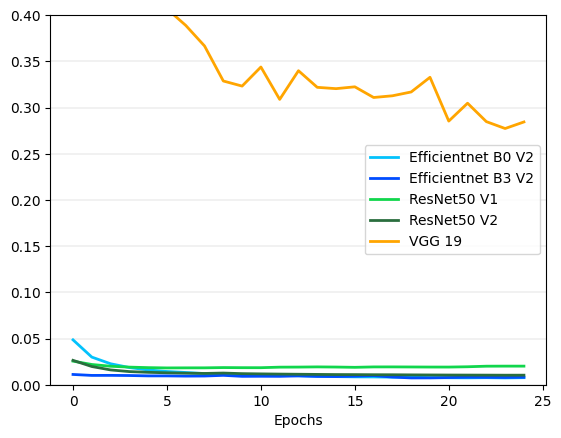

In [ ]:
plt.plot(efficientnet_b0_v2['epoch'], efficientnet_b0_v2['val_loss'], label = 'Efficientnet B0 V2', color="#03c2fc", lw=2)
plt.plot(efficientnet_b3_v2_df['epoch'], efficientnet_b3_v2_df['val_loss'], label = 'Efficientnet B3 V2', color="#004cff", lw=2)
plt.plot(res50_v1_df['epoch'], res50_v1_df['val_loss'], label = 'ResNet50 V1', color="#11d64c", lw=2)
plt.plot(res50_v2_df['epoch'], res50_v2_df['val_loss'], label = 'ResNet50 V2', color="#2a6e3e", lw=2)
plt.plot(vgg19_df['epoch'], vgg19_df['val_loss'], label = 'VGG 19', color="orange", lw=2)
plt.legend()
# plt.title('Validation Loss Comparison - Transfer Learning')
plt.xlabel('Epochs')
plt.ylim(0,0.4)
plt.grid(axis='y', linewidth=0.25)
plt.show()

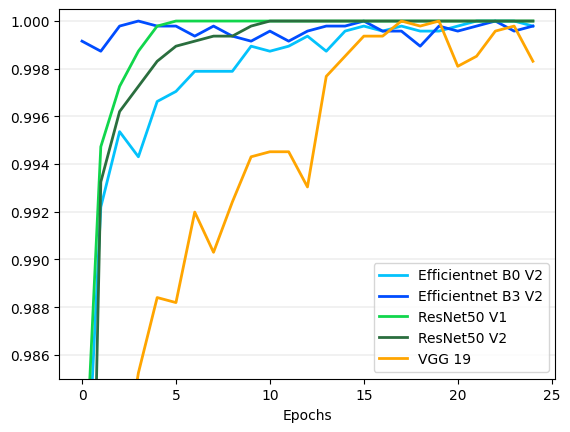

In [ ]:
plt.plot(efficientnet_b0_v2['epoch'], efficientnet_b0_v2['accuracy'], label = 'Efficientnet B0 V2', color="#03c2fc", lw=2)
plt.plot(efficientnet_b3_v2_df['epoch'], efficientnet_b3_v2_df['accuracy'], label = 'Efficientnet B3 V2', color="#004cff", lw=2)
plt.plot(res50_v1_df['epoch'], res50_v1_df['accuracy'], label = 'ResNet50 V1', color="#11d64c", lw=2)
plt.plot(res50_v2_df['epoch'], res50_v2_df['accuracy'], label = 'ResNet50 V2', color="#2a6e3e", lw=2)
plt.plot(vgg19_df['epoch'], vgg19_df['accuracy'], label = 'VGG 19', color="orange", lw=2)
plt.plot()
plt.legend()
# lt.title('Validation Accuracy Comparison - Transfer Learning')
plt.xlabel('Epochs')
plt.ylim(0.985,1.0005)
plt.grid(axis='y', linewidth=0.25)
plt.show()

## Different Idea

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Alternative function for plotting customizing y-axis. this is present in the file "helper_functions_new" which for some reason google colab doesn't want to open so i copied it here

In [ ]:
def plot_history(df, figsize=(12,6), y_lim=(0,1)):
    """
    Plots the loss and accuracy curves.
    :param df: the data frame containing the histories we want to plot
    :param y_lim: Tuple. If not differently specified, it's (0,1). Only applies to the accuracy plot.
    :return: None
    """

    fig, ax = plt.subplots(figsize=figsize, nrows=1, ncols=2)

    training_loss = df['loss']
    training_accuracy = df['accuracy']

    validation_loss = df['val_loss']
    validation_accuracy = df['val_accuracy']

    epochs = df['epoch']

    # Plot Loss
    ax[0].plot(epochs, training_loss, label = "Training Loss", linewidth=2, color="#0291b5")
    ax[0].plot(epochs, validation_loss, label = "Validation Loss", linewidth=2, color="#eb0076")
    ax[0].set_xlabel("Epochs")
    ax[0].set_title("Training Loss vs Validation Loss")
    ax[0].set_ylim(y_lim)
    ax[0].legend()
    ax[0].grid()

    # Plot Accuracy
    ax[1].plot(epochs, training_accuracy, label = "Training Accuracy", linewidth=2, color="#0291b5")
    ax[1].plot(epochs, validation_accuracy, label = "Validation Accuracy", linewidth=2, color="#eb0076")
    ax[1].set_xlabel("Epochs")
    ax[1].set_title("Training Accuracy vs Validation Accuracy")
    ax[1].set_ylim(y_lim)
    ax[1].legend()
    ax[1].grid()

    plt.show()

In [ ]:
def csv_to_df(filepath):
    """
    Takes a CSV file and creates a Pandas DataFrame.
    :param filepath: Path of the .csv file to create the DataFrame from.
    :return: A Pandas DataFrame containing the data from the CSV file.
    """

    # Reading the csv file and creating the DataFrame
    df = pd.read_csv(filepath)

    return df

In [ ]:
os.chdir("/content/drive/MyDrive/MachineLearningProject/histories/resnet")
!ls

res_14.log  res_32.log


In [ ]:
resnet32_df = csv_to_df(filepath="/content/drive/MyDrive/MachineLearningProject/histories/resnet/res_32.log")

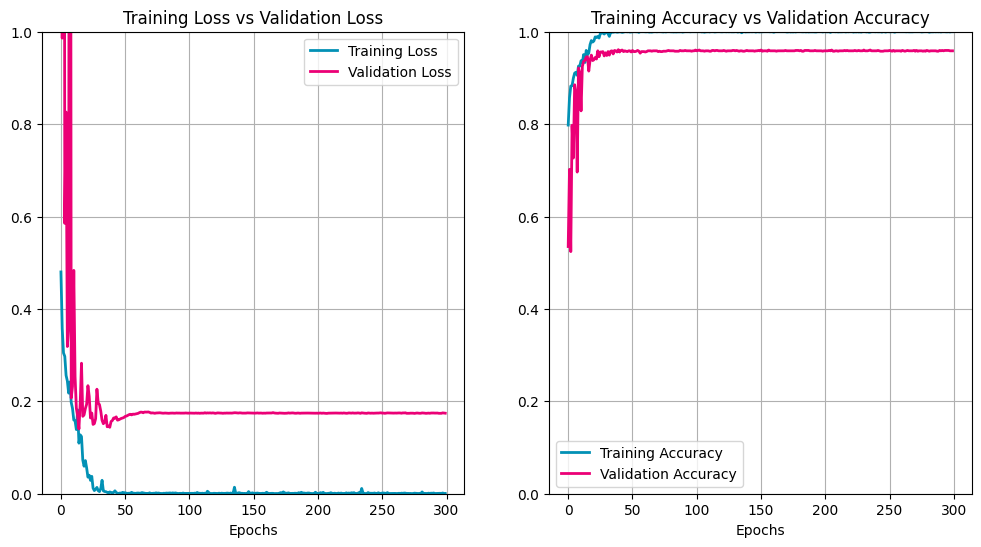

In [ ]:
plot_history(resnet32_df, y_lim=(0,1))